In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn import metrics

Using TensorFlow backend.


In [2]:
path = os.listdir('cstor/xsede/users/xs-haosun/SDSS_2000/')
#pick up the 1st image to have a look   
path_now = path[0]
a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
Obj_ID = []
Image = []
Class = []
Redshift = []
for i in range(len(path)):
    path_now = path[i]
    a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
    for j in range(a.shape[0]):
        Obj_ID.append(a[j]['objID'])
        Image.append(a[j]['image'])
        Class.append(a[j]['class'])
        Redshift.append(a[j]['z'])
Obj_ID = np.asarray(Obj_ID)
Image = np.asarray(Image)
Class = np.asarray(Class)
Redshift = np.asarray(Redshift)
Class[Class=='STAR'] = 0
Class[Class=='GALAXY'] = 1
Class[Class=='QSO'] = 2
Class = Class.astype(int)

Image_RGB = np.empty((len(Image),64,64,3))#(14142,64,64,3) RGB images
for i in range(len(Image)):
    #b[i] = np.stack((a[i][1][0],a[i][1][1],a[i][1][2],a[i][1][3],a[i][1][4]),axis=-1)
    Image_RGB[i] = np.stack((Image[i][3],Image[i][2],Image[i][1]),axis=-1)


for i in range(len(Image_RGB)):
    if True in np.isnan(Image_RGB[i]).reshape(64*64*3):
        print(i)
        Image_RGB[i][np.isnan(Image_RGB[i])==True]=np.mean(Image_RGB[i-1])
        
Image_RGB -= np.mean(Image_RGB)
Image_RGB /= np.max(Image_RGB)

8645


In [3]:
label = np_utils.to_categorical(Class, 3)
data = Image_RGB
index = [i for i in range(len(data))]
#random.shuffle(index)
train_data = data[index]
train_label = label[index]
Class = Class[index]
Redshift = Redshift[index]
print('train_data.shape:',train_data.shape)
print('train_label.shape:',train_label.shape)

train_data.shape: (14142, 64, 64, 3)
train_label.shape: (14142, 3)


Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 16s - loss: -7314.1034 - val_loss: -7547.6460
Epoch 2/50
12000/12000 [==============================] - 13s - loss: -7733.4352 - val_loss: -7948.3607
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7887.0385 - val_loss: -7809.9259
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7943.9412 - val_loss: -8007.3918
Epoch 5/50
12000/12000 [==============================] - 13s - loss: -7991.4854 - val_loss: -7967.4824
Epoch 6/50
12000/12000 [==============================] - 13s - loss: -7975.0868 - val_loss: -8039.8879
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8013.0850 - val_loss: -8015.4307
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8023.5035 - val_loss: -8007.5349
Epoch 9/50
12000/12000 [==============================] - 13s - loss: -8030.2556 - val_loss: -8034.7526
Epoch 10/50
120

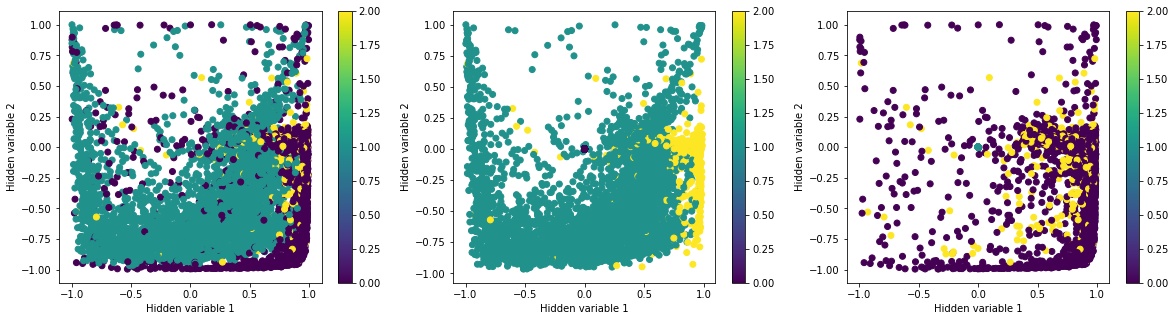

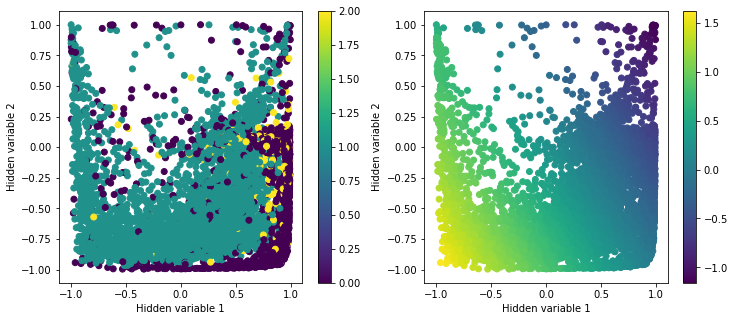

10000


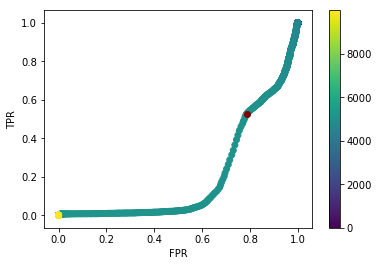

AUC: 0.200052761251
10000


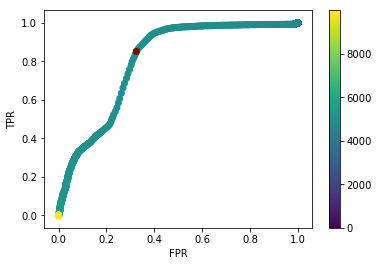

AUC: 0.799947238749
xunhuan =  0 this time, the AUC is: 0.799947238749
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7374.3595 - val_loss: -7601.1827
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7651.0784 - val_loss: -7180.67517654.67
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7880.8641 - val_loss: -7876.2247
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7932.5449 - val_loss: -7988.8217
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7964.8794 - val_loss: -7997.4229
Epoch 6/50
12000/12000 [==============================] - 13s - loss: -7966.4713 - val_loss: -7120.3666
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -7947.1614 - val_loss: -7933.2866
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -7977.3832 - val_loss: -8023.1617
Epoch 9/50
12000/12000 [=================

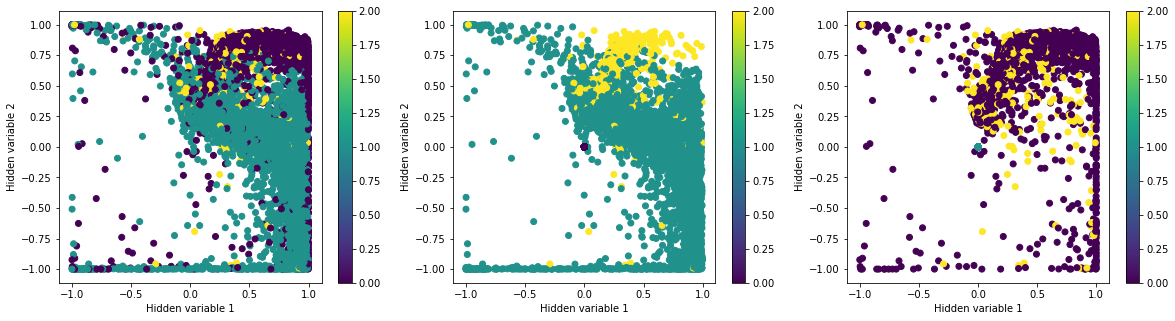

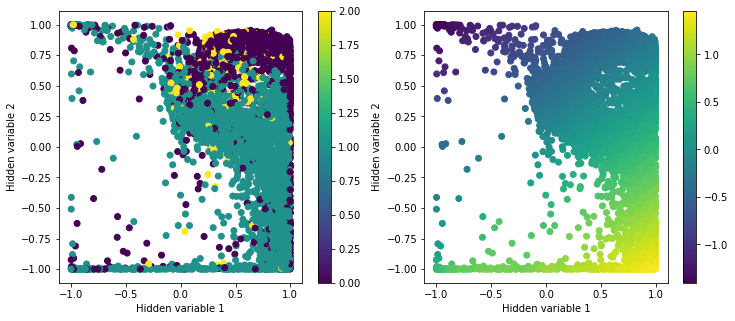

10000


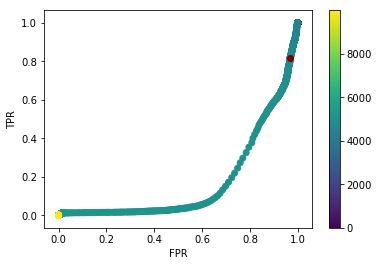

AUC: 0.17021165034
10000


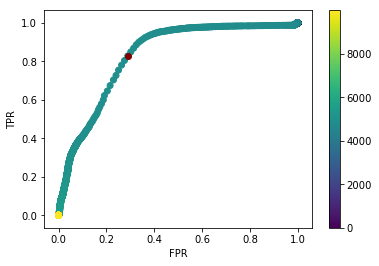

AUC: 0.82978834966
xunhuan =  1 this time, the AUC is: 0.82978834966
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7402.5389 - val_loss: -7755.6573
Epoch 2/50
12000/12000 [==============================] - 11s - loss: -7873.2960 - val_loss: -7767.5506
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7941.0857 - val_loss: -7971.1879
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7981.6084 - val_loss: -8020.1767
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7983.0416 - val_loss: -8022.8043
Epoch 6/50
12000/12000 [==============================] - 13s - loss: -7992.1533 - val_loss: -8019.7306
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -7998.2974 - val_loss: -7993.5105
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8007.4122 - val_loss: -8049.4641
Epoch 9/50
12000/12000 [==========================

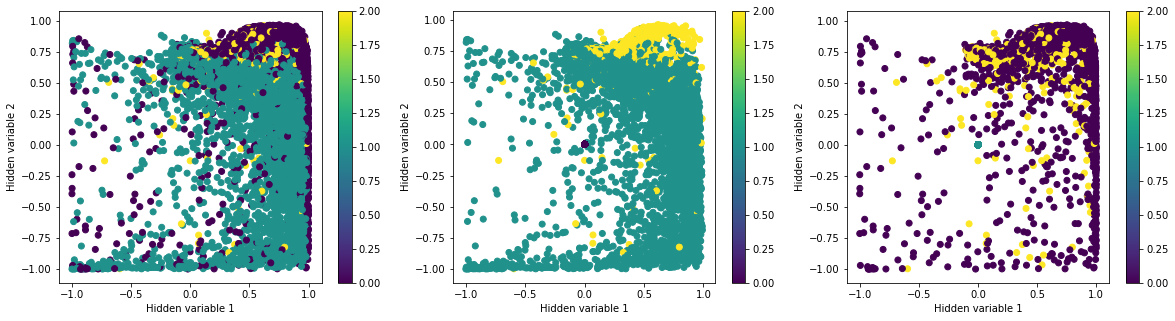

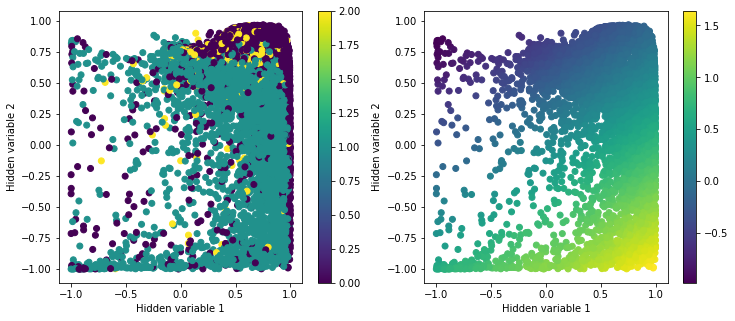

10000


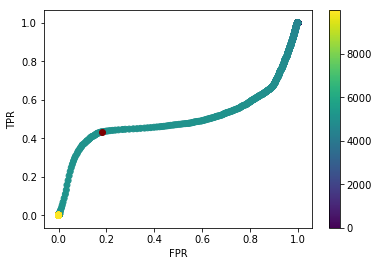

AUC: 0.497739460256
10000


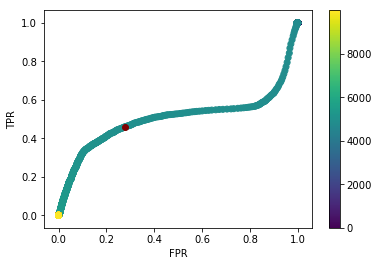

AUC: 0.502260539744
xunhuan =  2 this time, the AUC is: 0.502260539744
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7126.3477 - val_loss: -7565.2728
Epoch 2/50
12000/12000 [==============================] - 13s - loss: -7810.5717 - val_loss: -7840.7211
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7925.2760 - val_loss: -7964.2858
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7965.5690 - val_loss: -7958.8484
Epoch 5/50
12000/12000 [==============================] - 13s - loss: -7972.3271 - val_loss: -8046.5904
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7982.6107 - val_loss: -7940.9676
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8001.7879 - val_loss: -8013.1619
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8013.0505 - val_loss: -8052.5161
Epoch 9/50
12000/12000 [========================

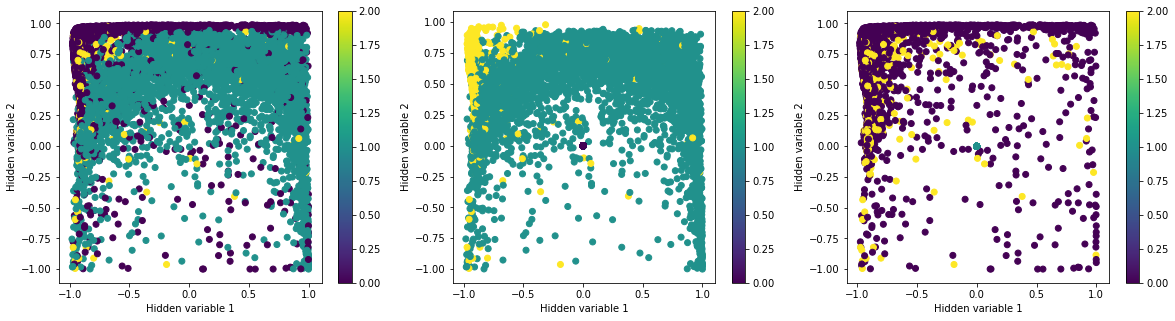

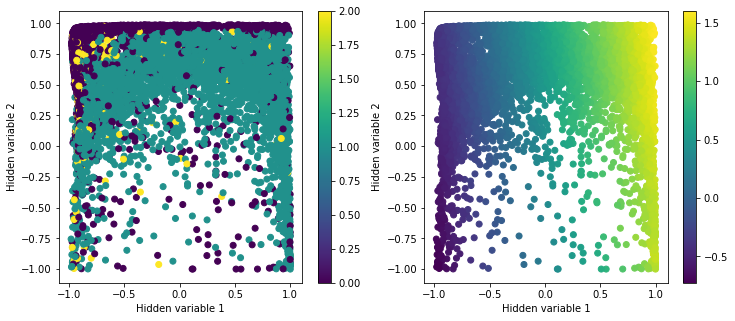

10000


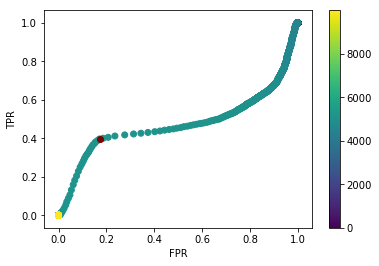

AUC: 0.472095434611
10000


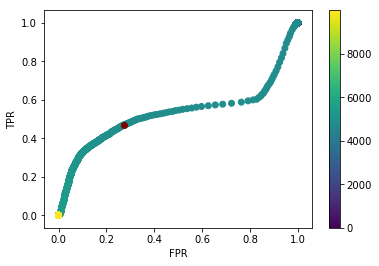

AUC: 0.527904565389
xunhuan =  3 this time, the AUC is: 0.527904565389
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7362.7599 - val_loss: -7489.2117
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7689.1486 - val_loss: -7995.0400
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7919.7553 - val_loss: -7964.0066
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7930.5910 - val_loss: -8026.3330
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7962.6614 - val_loss: -8026.1073
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7971.9053 - val_loss: -8033.0712
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -7996.0802 - val_loss: -8020.6961
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8000.6109 - val_loss: -8022.9245
Epoch 9/50
12000/12000 [========================

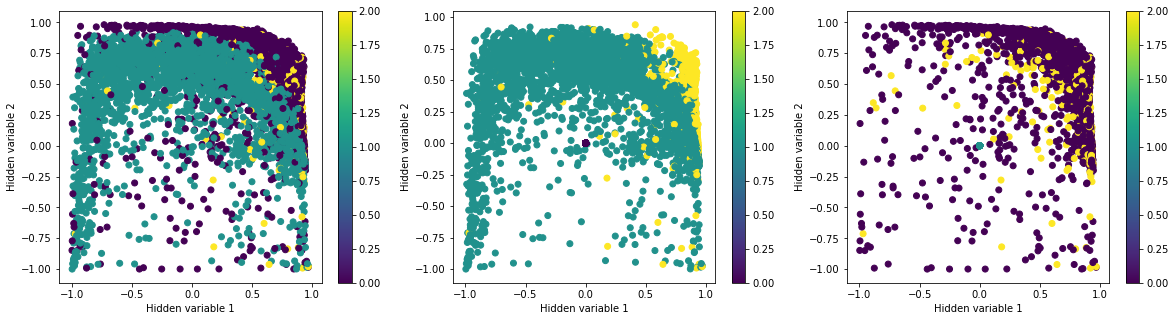

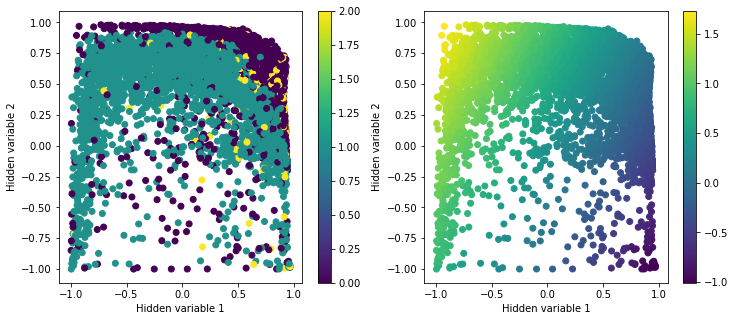

10000


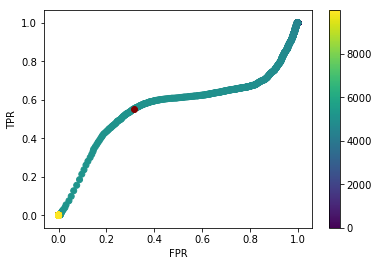

AUC: 0.55766150071
10000


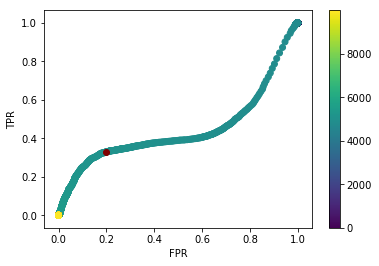

AUC: 0.44233849929
xunhuan =  4 this time, the AUC is: 0.55766150071
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7381.2822 - val_loss: -7696.8835
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7785.6429 - val_loss: -7924.5400
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7921.9132 - val_loss: -7996.3899
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7935.9689 - val_loss: -7959.1910
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7966.2236 - val_loss: -7993.2761
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7999.5673 - val_loss: -8042.0530
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -7995.6020 - val_loss: -8034.5147
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8013.7171 - val_loss: -8006.5212
Epoch 9/50
12000/12000 [==========================

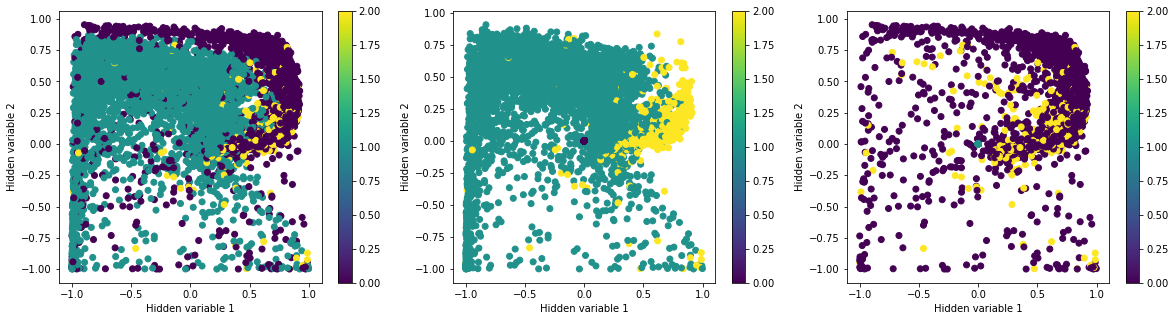

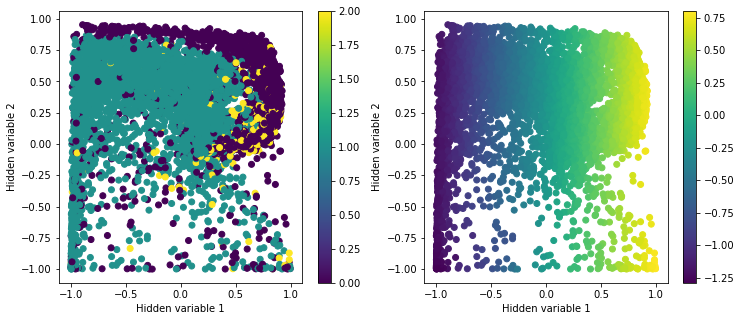

10000


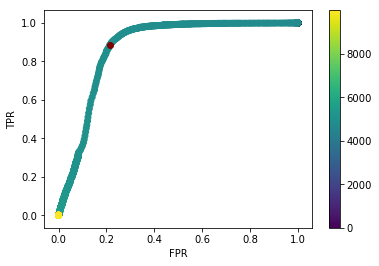

AUC: 0.870219270615
10000


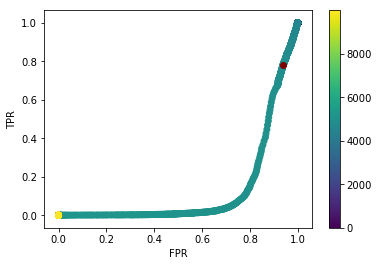

AUC: 0.129780729385
xunhuan =  5 this time, the AUC is: 0.870219270615
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7222.2252 - val_loss: -7465.2880
Epoch 2/50
12000/12000 [==============================] - 13s - loss: -7695.2807 - val_loss: -7845.5485
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7856.8693 - val_loss: -7874.0446
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7934.7341 - val_loss: -7964.3191
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7975.5886 - val_loss: -8023.7633
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7983.8395 - val_loss: -8006.1582
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -7994.8523 - val_loss: -8020.0984
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8018.0537 - val_loss: -7964.7749
Epoch 9/50
12000/12000 [========================

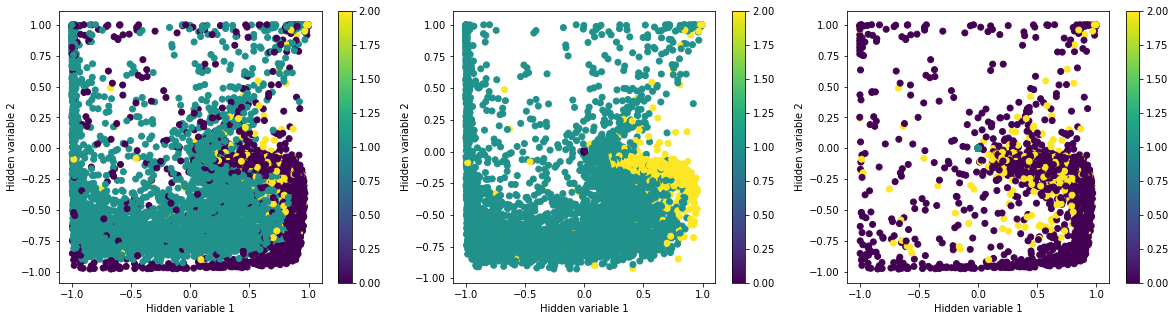

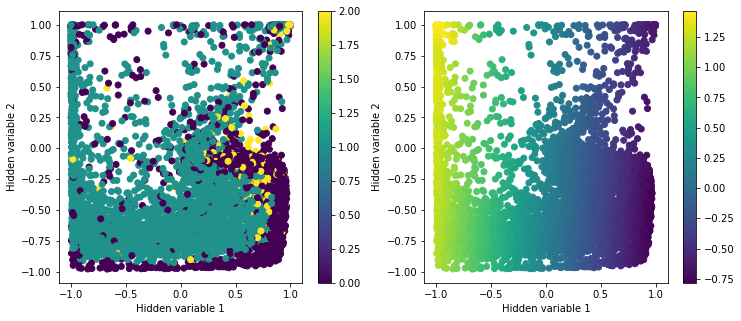

10000


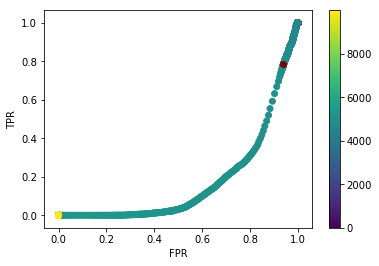

AUC: 0.172986840979
10000


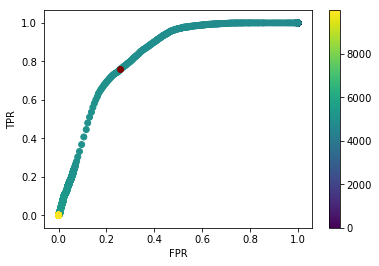

AUC: 0.827013159021
xunhuan =  6 this time, the AUC is: 0.827013159021
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7363.9132 - val_loss: -7794.1994
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7843.3865 - val_loss: -7998.6570
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7956.2796 - val_loss: -8015.1755
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7959.4067 - val_loss: -8007.3246
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8001.4441 - val_loss: -8027.5527
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8017.2438 - val_loss: -8042.5071
Epoch 7/50
12000/12000 [==============================] - 11s - loss: -8015.6331 - val_loss: -8040.8516
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8021.9847 - val_loss: -8029.4449
Epoch 9/50
12000/12000 [========================

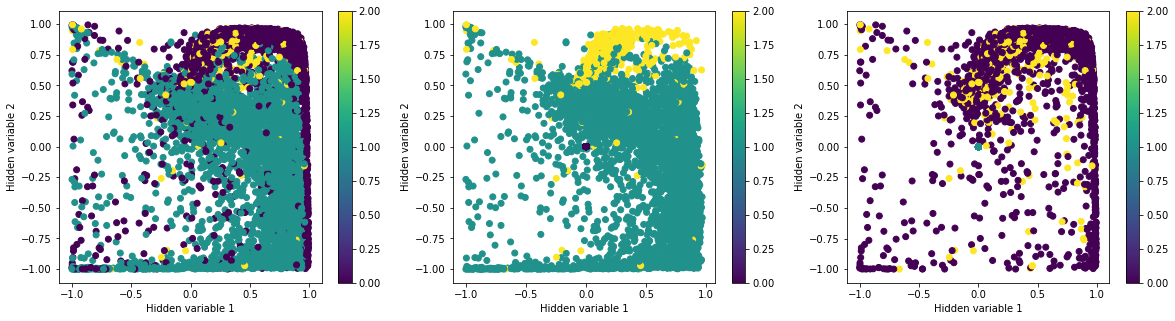

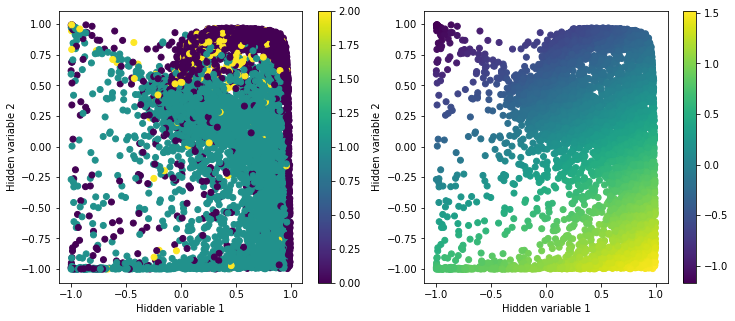

10000


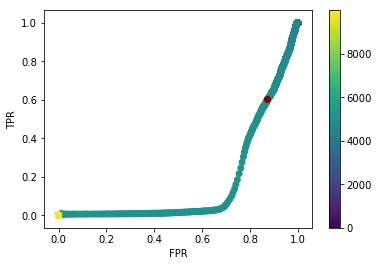

AUC: 0.166102300786
10000


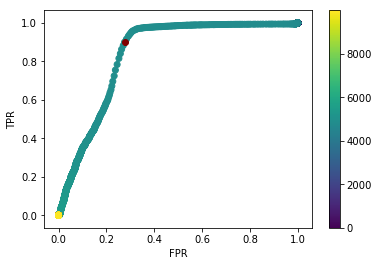

AUC: 0.833897699214
xunhuan =  7 this time, the AUC is: 0.833897699214
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 15s - loss: -7094.4057 - val_loss: -7697.7455
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7811.5404 - val_loss: -7909.5179
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7932.2509 - val_loss: -7939.6712
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7979.6280 - val_loss: -7544.1752
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7979.4858 - val_loss: -8027.7226
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7995.1678 - val_loss: -7881.9116
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8008.1923 - val_loss: -8038.2151
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8016.7829 - val_loss: -8050.5300
Epoch 9/50
12000/12000 [========================

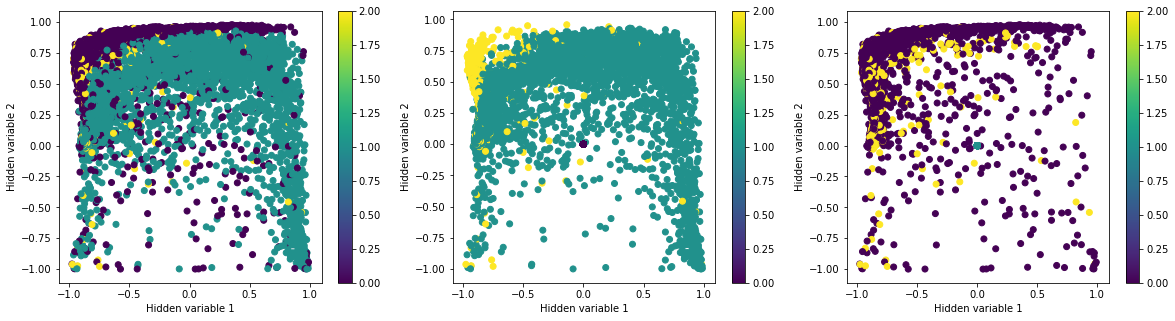

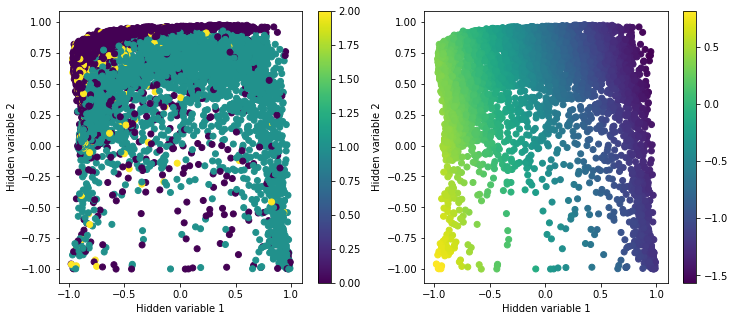

10000


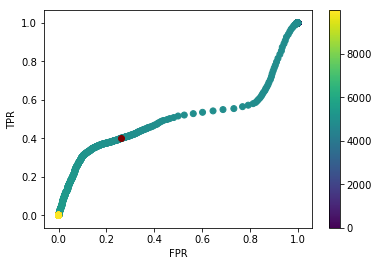

AUC: 0.501622862984
10000


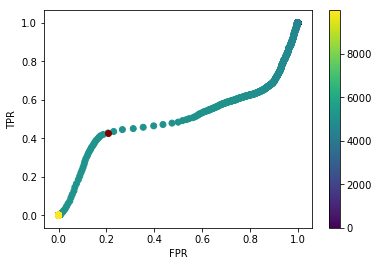

AUC: 0.498377137016
xunhuan =  8 this time, the AUC is: 0.501622862984
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -6518.7379 - val_loss: -6904.0919
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7685.4340 - val_loss: -7857.8502
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7898.0770 - val_loss: -7993.4690
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7948.0968 - val_loss: -8018.2839
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7954.8673 - val_loss: -7544.5694
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7994.0779 - val_loss: -7949.6805
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8006.8689 - val_loss: -8025.4422
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8020.7635 - val_loss: -7941.9025
Epoch 9/50
12000/12000 [========================

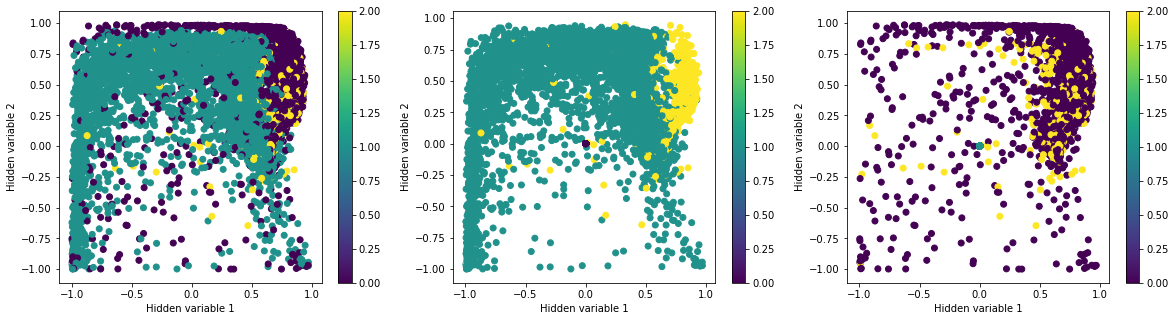

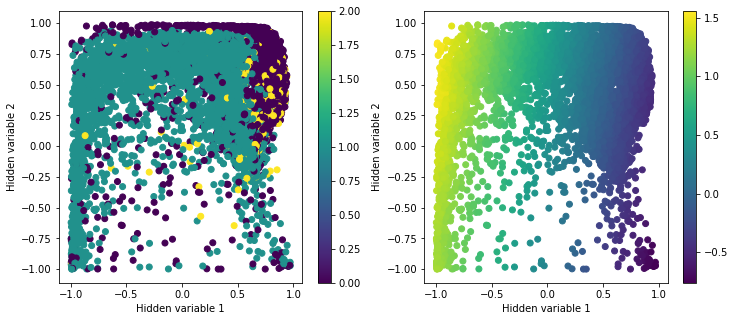

10000


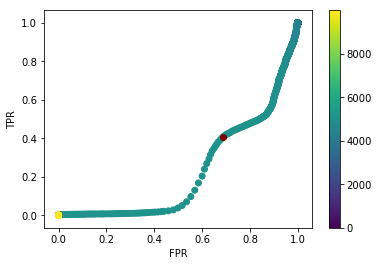

AUC: 0.225630987991
10000


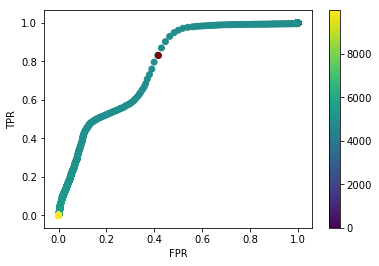

AUC: 0.774369012009
xunhuan =  9 this time, the AUC is: 0.774369012009


In [4]:
AUC_all = []
for xunhuan in range(10):
    batch_size =100
    latent_dim = 2
    nb_epoch = 50  
    epsilon_std = 0.1  
    intermediate_dim =256
    original_dim = 64*64

    #USE = 'autoencoder'
    USE = 'vae'
    #encoder:

    input_img = Input(shape=(64,64,3))


    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    #x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    #x = MaxPooling2D((2, 2),  padding='same')(x)

    visual = Flatten()(x)
    h_1 = Dense(intermediate_dim, activation='tanh')(visual)
    encoded = Dense(latent_dim, activation='relu')(h_1)

    #z_mean = Dense(latent_dim)(h_1)
    z_mean = Dense(latent_dim,activation='tanh')(h_1)
    z_log_var = Dense(latent_dim)(h_1)

    def sampling(args):   
        z_mean, z_log_var = args  
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2)* epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    if USE == 'vae':
        h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

    if USE == 'autoencoder':
        h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE


    h_4 = Dense(20*2*2,activation='relu')(h_3)
    h_5 = Reshape((2,2,20))(h_4)


    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(80,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(x)

    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


    def vae_loss(x, decoded):  
        xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
        kl_loss_1 = -K.sum(K.square(0 - (z_mean)), axis=-1)
        kl_loss_2 = K.sum(K.abs(1- K.exp(z_log_var)), axis=-1)
        return 1*xent_loss + 0.5*kl_loss_1 + 1*kl_loss_2  

    def ae_loss(x, decoded):  
        xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
        return xent_loss

    if USE == 'autoencoder':
        autoencoder = Model(inputs=input_img, outputs=decoded)
        autoencoder.compile(optimizer='rmsprop', loss=ae_loss)
    if USE == 'vae':
        vae = Model(inputs=input_img, outputs=decoded) 
        vae.compile(optimizer='rmsprop', loss=vae_loss) 
        vae.fit(train_data[:12000], train_data[:12000],
                shuffle=True,
                epochs=50,
                batch_size=batch_size,
                validation_data=(train_data[12000:14100],train_data[12000:14100]),callbacks=[EarlyStopping])    

    lower_lim = 0
    upper_lim = 14100

    label_value = np.zeros(len(train_label))
    for i in range(len(label_value)):
        label_value[i] =np.argmax(train_label[i])

    vis = Model(input_img, z_mean)

    # display a 2D plot of the digit classes in the latent space  
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)

    x_vis_1 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_1[label_value[lower_lim:upper_lim]<1]=0

    x_vis_2 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_2[label_value[lower_lim:upper_lim]==1]=0

    plt.figure(figsize=(20, 5))

    ax = plt.subplot(1,3,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,2)
    plt.scatter( x_vis_1[:, 0] ,x_vis_1[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,3)
    plt.scatter( x_vis_2[:, 0] ,x_vis_2[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    lower_lim = 0
    upper_lim = 14100


    vis = Model(input_img, z_mean)
    # display a 2D plot of the digit classes in the latent space
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    n_neighbors = 10
    n_components = 1
    isomap = manifold.Isomap(n_neighbors, n_components)
    hid_pred = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    Y_pred = isomap.fit_transform(hid_pred)


    plt.figure(figsize=(12, 5))

    ax = plt.subplot(1,2,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,2,2)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=Y_pred)
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_1 = metrics.auc(FPR, TPR)
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_2 = metrics.auc(FPR, TPR)
    AUC = AUC_2
    if AUC_1>AUC_2:
        AUC = AUC_1
    print("xunhuan = ",xunhuan,"this time, the AUC is:",AUC)
    AUC_all.append(AUC)    

# KL after AW ?

MEAN AUC =  0.702468419809


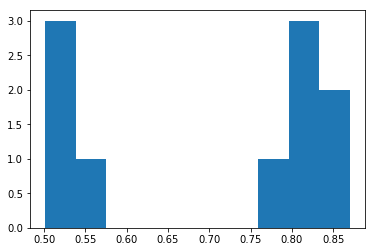

In [5]:
AUC_all = np.asarray(AUC_all)
print("MEAN AUC = ",np.mean(AUC_all))
plt.hist(AUC_all)
plt.show()